In [1]:
import os
import warnings
import glob as glob
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option("display.max_columns", None)
warnings.filterwarnings("ignore")

In [2]:
files = glob.glob("data/*.csv")
len(files)

51

In [3]:
    # renamed_cols = {"time": "time",
    #             "Dir  °T": "direction_wind", 
    #             "Speed  kt": "average wind", 
    #             "Max Gust Hourly kt": "maximum_wind",
    #             "Rain Hourly mm": "total rainfall",
    #             "Radn Hourly MJ/m²": "solar radiation", 

In [4]:
feature = "Temp  °C"

In [5]:
dataset = None
for file in files:
    dname = "_".join(file.split("_")[1:3])
    df = pd.read_csv(file)
    df = df.rename(columns={df.columns[0]: "time"})                
    df = df.rename({feature: dname}, axis=1)
    if dataset is None:
        dataset = df[["time", dname]]
    else:
        dataset = dataset.merge(df[["time", dname]], on=["time"], how="outer")

In [6]:
dataset.head()

,time,Napier_Aerodrome,Wellington_Aerodrome,Enderby_Island,Mokohinau_Island,Cape_Campbell,Westport_Aerodrome,Mahia_NZMHX,Nelson_Aerodrome,Queenstown_Aerodrome,Auckland_Aerodrome,Whanganui_Aerodrome,Farewell_Spit,Kaikoura_NZKIX,Kerikeri_Aerodrome,Castlepoint_NZCPX,Haast_NZHTX,New_Plymouth,Milford_Sound,Whangarei_Aerodrome,Christchurch_Aerodrome,Tara_Hills,Whitianga_Aerodrome,Paraparaumu_Aerodrome,Le_Bons,Waiouru_Aerodrome,Ngawi_NZNWX,Oamaru_Aerodrome,Hokitika_Aerodrome,Stephens_Island,Tauranga_Aerodrome,Raoul_Island,Hamilton_Aerodrome,Hicks_Bay,Timaru_Airport,Taupo_Aerodrome,Puysegur_Point,Chatham_Island,South_West,Hawera_NZHAX,Mt_Cook,Campbell_Island,Invercargill_NZNVA,Port_Taharoa,Palmerston_N,Gisborne_Aerodrome,Nugget_Point,Dunedin_Aerodrome,Cape_Reinga,Secretary_Island,Kaitaia_Aerodrome,Takapau_Plains
0,01-Apr-1993 00:00,15.0,NaN,7.0,NaN,11.0,17.0,14.0,15.0,8.0,16.0,16.0,15.0,9.0,NaN,14.0,15.0,14.0,NaN,15.0,NaN,7.0,16.0,14.0,8.0,NaN,14.0,9.0,13.0,NaN,15.0,23.0,16.0,17.0,9.0,NaN,10.0,NaN,8.0,NaN,NaN,NaN,NaN,15.0,14.0,16.0,NaN,8.0,17.0,NaN,NaN,NaN
1,01-Apr-1993 01:00,14.0,NaN,7.0,NaN,11.0,16.0,14.0,15.0,8.0,16.0,15.0,15.0,9.0,NaN,14.0,16.0,14.0,NaN,15.0,NaN,7.0,17.0,14.0,8.0,NaN,13.0,9.0,11.0,NaN,15.0,24.0,15.0,17.0,9.0,13.0,9.0,NaN,8.0,NaN,NaN,NaN,NaN,14.0,15.0,15.0,NaN,8.0,16.0,NaN,NaN,NaN
2,01-Apr-1993 02:00,14.0,NaN,7.0,NaN,11.0,16.0,15.0,15.0,7.0,15.0,14.0,15.0,10.0,NaN,14.0,16.0,14.0,NaN,15.0,NaN,6.0,15.0,14.0,8.0,NaN,12.0,9.0,12.0,NaN,15.0,24.0,14.0,16.0,9.0,12.0,9.0,NaN,9.0,NaN,NaN,NaN,NaN,14.0,14.0,15.0,NaN,8.0,16.0,NaN,NaN,NaN
3,01-Apr-1993 03:00,13.0,NaN,7.0,NaN,11.0,16.0,15.0,14.0,6.0,15.0,15.0,15.0,9.0,NaN,14.0,15.0,14.0,NaN,14.0,NaN,7.0,14.0,13.0,8.0,NaN,11.0,9.0,13.0,NaN,14.0,24.0,14.0,16.0,8.0,11.0,8.0,NaN,8.0,NaN,NaN,NaN,NaN,15.0,14.0,14.0,NaN,8.0,16.0,NaN,NaN,NaN
4,01-Apr-1993 04:00,13.0,NaN,7.0,NaN,11.0,15.0,15.0,14.0,7.0,15.0,15.0,14.0,9.0,NaN,14.0,15.0,14.0,NaN,14.0,NaN,7.0,13.0,13.0,8.0,NaN,11.0,9.0,13.0,NaN,15.0,24.0,15.0,16.0,8.0,10.0,8.0,NaN,8.0,NaN,NaN,NaN,NaN,15.0,14.0,14.0,NaN,8.0,16.0,NaN,NaN,NaN


In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 259453 entries, 0 to 259452
Data columns (total 52 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   time                    259453 non-null  object 
 1   Napier_Aerodrome        257657 non-null  float64
 2   Wellington_Aerodrome    245440 non-null  float64
 3   Enderby_Island          235419 non-null  float64
 4   Mokohinau_Island        241934 non-null  float64
 5   Cape_Campbell           254690 non-null  float64
 6   Westport_Aerodrome      257088 non-null  float64
 7   Mahia_NZMHX             37601 non-null   float64
 8   Nelson_Aerodrome        257416 non-null  float64
 9   Queenstown_Aerodrome    257730 non-null  float64
 10  Auckland_Aerodrome      257962 non-null  float64
 11  Whanganui_Aerodrome     256454 non-null  float64
 12  Farewell_Spit           255155 non-null  float64
 13  Kaikoura_NZKIX          257613 non-null  float64
 14  Kerikeri_Aerodrome  

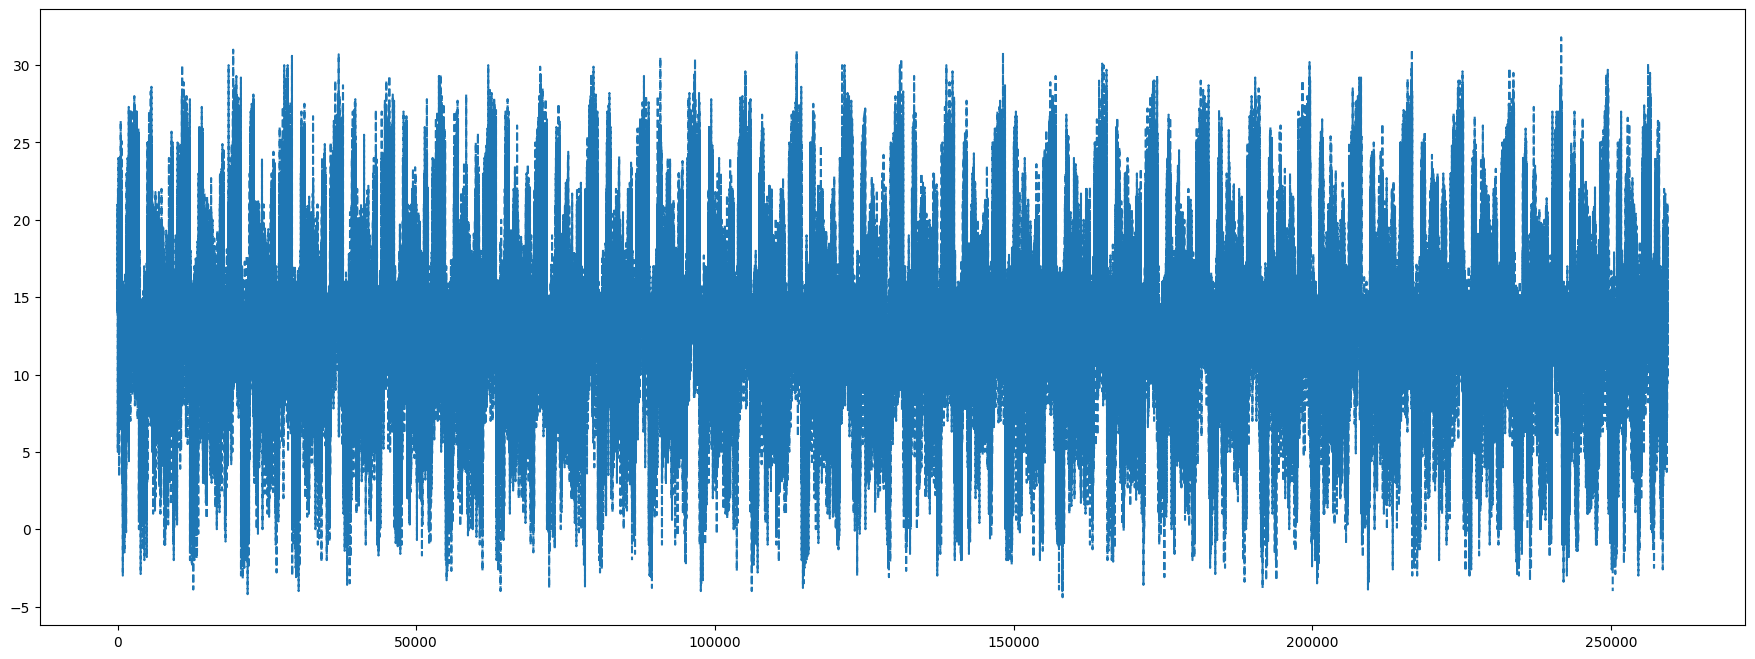

In [8]:
plt.figure(figsize=(22, 8))
plt.plot(dataset.Hamilton_Aerodrome.values, "--")
plt.show()

In [9]:
dataset.to_csv("dataset_temperature_c.csv", index=False)

## Pre Processing

In [10]:
dataset.head()

,time,Napier_Aerodrome,Wellington_Aerodrome,Enderby_Island,Mokohinau_Island,Cape_Campbell,Westport_Aerodrome,Mahia_NZMHX,Nelson_Aerodrome,Queenstown_Aerodrome,Auckland_Aerodrome,Whanganui_Aerodrome,Farewell_Spit,Kaikoura_NZKIX,Kerikeri_Aerodrome,Castlepoint_NZCPX,Haast_NZHTX,New_Plymouth,Milford_Sound,Whangarei_Aerodrome,Christchurch_Aerodrome,Tara_Hills,Whitianga_Aerodrome,Paraparaumu_Aerodrome,Le_Bons,Waiouru_Aerodrome,Ngawi_NZNWX,Oamaru_Aerodrome,Hokitika_Aerodrome,Stephens_Island,Tauranga_Aerodrome,Raoul_Island,Hamilton_Aerodrome,Hicks_Bay,Timaru_Airport,Taupo_Aerodrome,Puysegur_Point,Chatham_Island,South_West,Hawera_NZHAX,Mt_Cook,Campbell_Island,Invercargill_NZNVA,Port_Taharoa,Palmerston_N,Gisborne_Aerodrome,Nugget_Point,Dunedin_Aerodrome,Cape_Reinga,Secretary_Island,Kaitaia_Aerodrome,Takapau_Plains
0,01-Apr-1993 00:00,15.0,NaN,7.0,NaN,11.0,17.0,14.0,15.0,8.0,16.0,16.0,15.0,9.0,NaN,14.0,15.0,14.0,NaN,15.0,NaN,7.0,16.0,14.0,8.0,NaN,14.0,9.0,13.0,NaN,15.0,23.0,16.0,17.0,9.0,NaN,10.0,NaN,8.0,NaN,NaN,NaN,NaN,15.0,14.0,16.0,NaN,8.0,17.0,NaN,NaN,NaN
1,01-Apr-1993 01:00,14.0,NaN,7.0,NaN,11.0,16.0,14.0,15.0,8.0,16.0,15.0,15.0,9.0,NaN,14.0,16.0,14.0,NaN,15.0,NaN,7.0,17.0,14.0,8.0,NaN,13.0,9.0,11.0,NaN,15.0,24.0,15.0,17.0,9.0,13.0,9.0,NaN,8.0,NaN,NaN,NaN,NaN,14.0,15.0,15.0,NaN,8.0,16.0,NaN,NaN,NaN
2,01-Apr-1993 02:00,14.0,NaN,7.0,NaN,11.0,16.0,15.0,15.0,7.0,15.0,14.0,15.0,10.0,NaN,14.0,16.0,14.0,NaN,15.0,NaN,6.0,15.0,14.0,8.0,NaN,12.0,9.0,12.0,NaN,15.0,24.0,14.0,16.0,9.0,12.0,9.0,NaN,9.0,NaN,NaN,NaN,NaN,14.0,14.0,15.0,NaN,8.0,16.0,NaN,NaN,NaN
3,01-Apr-1993 03:00,13.0,NaN,7.0,NaN,11.0,16.0,15.0,14.0,6.0,15.0,15.0,15.0,9.0,NaN,14.0,15.0,14.0,NaN,14.0,NaN,7.0,14.0,13.0,8.0,NaN,11.0,9.0,13.0,NaN,14.0,24.0,14.0,16.0,8.0,11.0,8.0,NaN,8.0,NaN,NaN,NaN,NaN,15.0,14.0,14.0,NaN,8.0,16.0,NaN,NaN,NaN
4,01-Apr-1993 04:00,13.0,NaN,7.0,NaN,11.0,15.0,15.0,14.0,7.0,15.0,15.0,14.0,9.0,NaN,14.0,15.0,14.0,NaN,14.0,NaN,7.0,13.0,13.0,8.0,NaN,11.0,9.0,13.0,NaN,15.0,24.0,15.0,16.0,8.0,10.0,8.0,NaN,8.0,NaN,NaN,NaN,NaN,15.0,14.0,14.0,NaN,8.0,16.0,NaN,NaN,NaN


In [11]:
def add_train_test_split_column(df, time_col='time', test_size=0.2):
    """
    Adiciona coluna indicando split treino/teste baseado na ordem temporal
    """
    df_sorted = df.sort_values(time_col).copy()
    
    # Calcular o índice de corte baseado no tempo
    split_idx = int(len(df_sorted) * (1 - test_size))
    
    # Criar coluna de split (True para treino, False para teste)
    df_sorted['split'] = True  # Treino
    df_sorted.iloc[split_idx:, df_sorted.columns.get_loc('split')] = False  # Teste
    
    print(f"Treino: {df_sorted['split'].sum()} amostras")
    print(f"Teste: {len(df_sorted) - df_sorted['split'].sum()} amostras")
    
    return df_sorted

In [12]:
# 2. Interpolação sem data leakage (apenas nos dados de treino)
def safe_interpolation(df, time_col='time', split_col='split'):
    """
    Faz interpolação sem data leakage - apenas no treino
    """
    df_processed = df.copy()
    
    # Separar treino e teste
    train_mask = df_processed[split_col] == True
    test_mask = df_processed[split_col] == False
    
    # Colunas para interpolar (todas exceto time e split)
    cols_to_interpolate = [col for col in df_processed.columns 
                          if col not in [time_col, split_col]]
    
    # Para cada coluna, fazer interpolação apenas no treino
    for col in cols_to_interpolate:
        if df_processed[col].isna().any():
            print(f"Interpolando coluna: {col}")
            
            # Apenas no conjunto de treino
            train_data = df_processed.loc[train_mask, col].copy()
            
            # Fazer interpolação linear apenas nos dados de treino
            train_interpolated = train_data.interpolate(method='linear')
            
            # Preencher valores restantes (início/fim) com forward/backward fill
            train_filled = train_interpolated.ffill().bfill()
            
            # Atualizar apenas a parte de treino do dataframe original
            df_processed.loc[train_mask, col] = train_filled
            
            # preencher com a média do treino (opcional)
            if df_processed.loc[test_mask, col].isna().any():
                train_mean = train_filled.mean()
                df_processed.loc[test_mask, col] = df_processed.loc[test_mask, col].fillna(train_mean)
    
    return df_processed

In [13]:
# Aplicar as funções
print("Dataset original:")
print(f"Shape: {dataset.shape}")
print(f"Colunas: {dataset.columns.tolist()}")
print(f"Valores NA totais: {dataset.isna().sum().sum()}")

Dataset original:
Shape: (259453, 52)
Colunas: ['time', 'Napier_Aerodrome', 'Wellington_Aerodrome', 'Enderby_Island', 'Mokohinau_Island', 'Cape_Campbell', 'Westport_Aerodrome', 'Mahia_NZMHX', 'Nelson_Aerodrome', 'Queenstown_Aerodrome', 'Auckland_Aerodrome', 'Whanganui_Aerodrome', 'Farewell_Spit', 'Kaikoura_NZKIX', 'Kerikeri_Aerodrome', 'Castlepoint_NZCPX', 'Haast_NZHTX', 'New_Plymouth', 'Milford_Sound', 'Whangarei_Aerodrome', 'Christchurch_Aerodrome', 'Tara_Hills', 'Whitianga_Aerodrome', 'Paraparaumu_Aerodrome', 'Le_Bons', 'Waiouru_Aerodrome', 'Ngawi_NZNWX', 'Oamaru_Aerodrome', 'Hokitika_Aerodrome', 'Stephens_Island', 'Tauranga_Aerodrome', 'Raoul_Island', 'Hamilton_Aerodrome', 'Hicks_Bay', 'Timaru_Airport', 'Taupo_Aerodrome', 'Puysegur_Point', 'Chatham_Island', 'South_West', 'Hawera_NZHAX', 'Mt_Cook', 'Campbell_Island', 'Invercargill_NZNVA', 'Port_Taharoa', 'Palmerston_N', 'Gisborne_Aerodrome', 'Nugget_Point', 'Dunedin_Aerodrome', 'Cape_Reinga', 'Secretary_Island', 'Kaitaia_Aerodrome',

In [14]:
# 1. Adicionar coluna de split treino/teste
dataset_with_split = add_train_test_split_column(dataset)

Treino: 207562 amostras
Teste: 51891 amostras


In [15]:
dataset_with_split.head()

,time,Napier_Aerodrome,Wellington_Aerodrome,Enderby_Island,Mokohinau_Island,Cape_Campbell,Westport_Aerodrome,Mahia_NZMHX,Nelson_Aerodrome,Queenstown_Aerodrome,Auckland_Aerodrome,Whanganui_Aerodrome,Farewell_Spit,Kaikoura_NZKIX,Kerikeri_Aerodrome,Castlepoint_NZCPX,Haast_NZHTX,New_Plymouth,Milford_Sound,Whangarei_Aerodrome,Christchurch_Aerodrome,Tara_Hills,Whitianga_Aerodrome,Paraparaumu_Aerodrome,Le_Bons,Waiouru_Aerodrome,Ngawi_NZNWX,Oamaru_Aerodrome,Hokitika_Aerodrome,Stephens_Island,Tauranga_Aerodrome,Raoul_Island,Hamilton_Aerodrome,Hicks_Bay,Timaru_Airport,Taupo_Aerodrome,Puysegur_Point,Chatham_Island,South_West,Hawera_NZHAX,Mt_Cook,Campbell_Island,Invercargill_NZNVA,Port_Taharoa,Palmerston_N,Gisborne_Aerodrome,Nugget_Point,Dunedin_Aerodrome,Cape_Reinga,Secretary_Island,Kaitaia_Aerodrome,Takapau_Plains,split
0,01-Apr-1993 00:00,15.0,NaN,7.0,NaN,11.0,17.0,14.0,15.0,8.0,16.0,16.0,15.0,9.0,NaN,14.0,15.0,14.0,NaN,15.0,NaN,7.0,16.0,14.0,8.0,NaN,14.0,9.0,13.0,NaN,15.0,23.0,16.0,17.0,9.0,NaN,10.0,NaN,8.0,NaN,NaN,NaN,NaN,15.0,14.0,16.0,NaN,8.0,17.0,NaN,NaN,NaN,True
1,01-Apr-1993 01:00,14.0,NaN,7.0,NaN,11.0,16.0,14.0,15.0,8.0,16.0,15.0,15.0,9.0,NaN,14.0,16.0,14.0,NaN,15.0,NaN,7.0,17.0,14.0,8.0,NaN,13.0,9.0,11.0,NaN,15.0,24.0,15.0,17.0,9.0,13.0,9.0,NaN,8.0,NaN,NaN,NaN,NaN,14.0,15.0,15.0,NaN,8.0,16.0,NaN,NaN,NaN,True
2,01-Apr-1993 02:00,14.0,NaN,7.0,NaN,11.0,16.0,15.0,15.0,7.0,15.0,14.0,15.0,10.0,NaN,14.0,16.0,14.0,NaN,15.0,NaN,6.0,15.0,14.0,8.0,NaN,12.0,9.0,12.0,NaN,15.0,24.0,14.0,16.0,9.0,12.0,9.0,NaN,9.0,NaN,NaN,NaN,NaN,14.0,14.0,15.0,NaN,8.0,16.0,NaN,NaN,NaN,True
3,01-Apr-1993 03:00,13.0,NaN,7.0,NaN,11.0,16.0,15.0,14.0,6.0,15.0,15.0,15.0,9.0,NaN,14.0,15.0,14.0,NaN,14.0,NaN,7.0,14.0,13.0,8.0,NaN,11.0,9.0,13.0,NaN,14.0,24.0,14.0,16.0,8.0,11.0,8.0,NaN,8.0,NaN,NaN,NaN,NaN,15.0,14.0,14.0,NaN,8.0,16.0,NaN,NaN,NaN,True
4,01-Apr-1993 04:00,13.0,NaN,7.0,NaN,11.0,15.0,15.0,14.0,7.0,15.0,15.0,14.0,9.0,NaN,14.0,15.0,14.0,NaN,14.0,NaN,7.0,13.0,13.0,8.0,NaN,11.0,9.0,13.0,NaN,15.0,24.0,15.0,16.0,8.0,10.0,8.0,NaN,8.0,NaN,NaN,NaN,NaN,15.0,14.0,14.0,NaN,8.0,16.0,NaN,NaN,NaN,True


In [16]:
# 2. Fazer interpolação segura
dataset_processed = safe_interpolation(dataset_with_split)

Interpolando coluna: Napier_Aerodrome
Interpolando coluna: Wellington_Aerodrome
Interpolando coluna: Enderby_Island
Interpolando coluna: Mokohinau_Island
Interpolando coluna: Cape_Campbell
Interpolando coluna: Westport_Aerodrome
Interpolando coluna: Mahia_NZMHX
Interpolando coluna: Nelson_Aerodrome
Interpolando coluna: Queenstown_Aerodrome
Interpolando coluna: Auckland_Aerodrome
Interpolando coluna: Whanganui_Aerodrome
Interpolando coluna: Farewell_Spit
Interpolando coluna: Kaikoura_NZKIX
Interpolando coluna: Kerikeri_Aerodrome
Interpolando coluna: Castlepoint_NZCPX
Interpolando coluna: Haast_NZHTX
Interpolando coluna: New_Plymouth
Interpolando coluna: Milford_Sound
Interpolando coluna: Whangarei_Aerodrome
Interpolando coluna: Christchurch_Aerodrome
Interpolando coluna: Tara_Hills
Interpolando coluna: Whitianga_Aerodrome
Interpolando coluna: Paraparaumu_Aerodrome
Interpolando coluna: Le_Bons
Interpolando coluna: Waiouru_Aerodrome
Interpolando coluna: Ngawi_NZNWX
Interpolando coluna: Oa

In [17]:

print("\nDataset processado:")
print(f"Valores NA no treino: {dataset_processed[dataset_processed['split'] == True].isna().sum().sum()}")
print(f"Valores NA no teste: {dataset_processed[dataset_processed['split'] == False].isna().sum().sum()}")


Dataset processado:
Valores NA no treino: 0
Valores NA no teste: 0


In [18]:
dataset_processed.shape

(259453, 53)

In [19]:
dataset_processed.head()

,time,Napier_Aerodrome,Wellington_Aerodrome,Enderby_Island,Mokohinau_Island,Cape_Campbell,Westport_Aerodrome,Mahia_NZMHX,Nelson_Aerodrome,Queenstown_Aerodrome,Auckland_Aerodrome,Whanganui_Aerodrome,Farewell_Spit,Kaikoura_NZKIX,Kerikeri_Aerodrome,Castlepoint_NZCPX,Haast_NZHTX,New_Plymouth,Milford_Sound,Whangarei_Aerodrome,Christchurch_Aerodrome,Tara_Hills,Whitianga_Aerodrome,Paraparaumu_Aerodrome,Le_Bons,Waiouru_Aerodrome,Ngawi_NZNWX,Oamaru_Aerodrome,Hokitika_Aerodrome,Stephens_Island,Tauranga_Aerodrome,Raoul_Island,Hamilton_Aerodrome,Hicks_Bay,Timaru_Airport,Taupo_Aerodrome,Puysegur_Point,Chatham_Island,South_West,Hawera_NZHAX,Mt_Cook,Campbell_Island,Invercargill_NZNVA,Port_Taharoa,Palmerston_N,Gisborne_Aerodrome,Nugget_Point,Dunedin_Aerodrome,Cape_Reinga,Secretary_Island,Kaitaia_Aerodrome,Takapau_Plains,split
0,01-Apr-1993 00:00,15.0,17.0,7.0,17.0,11.0,17.0,14.0,15.0,8.0,16.0,16.0,15.0,9.0,15.1,14.0,15.0,14.0,9.0,15.0,14.0,7.0,16.0,14.0,8.0,7.8,14.0,9.0,13.0,18.3,15.0,23.0,16.0,17.0,9.0,13.0,10.0,11.6,8.0,5.8,15.1,12.0,14.0,15.0,14.0,16.0,10.0,8.0,17.0,14.0,16.5,11.4,True
1,01-Apr-1993 01:00,14.0,17.0,7.0,17.0,11.0,16.0,14.0,15.0,8.0,16.0,15.0,15.0,9.0,15.1,14.0,16.0,14.0,9.0,15.0,14.0,7.0,17.0,14.0,8.0,7.8,13.0,9.0,11.0,18.3,15.0,24.0,15.0,17.0,9.0,13.0,9.0,11.6,8.0,5.8,15.1,12.0,14.0,14.0,15.0,15.0,10.0,8.0,16.0,14.0,16.5,11.4,True
2,01-Apr-1993 02:00,14.0,17.0,7.0,17.0,11.0,16.0,15.0,15.0,7.0,15.0,14.0,15.0,10.0,15.1,14.0,16.0,14.0,9.0,15.0,14.0,6.0,15.0,14.0,8.0,7.8,12.0,9.0,12.0,18.3,15.0,24.0,14.0,16.0,9.0,12.0,9.0,11.6,9.0,5.8,15.1,12.0,14.0,14.0,14.0,15.0,10.0,8.0,16.0,14.0,16.5,11.4,True
3,01-Apr-1993 03:00,13.0,17.0,7.0,17.0,11.0,16.0,15.0,14.0,6.0,15.0,15.0,15.0,9.0,15.1,14.0,15.0,14.0,9.0,14.0,14.0,7.0,14.0,13.0,8.0,7.8,11.0,9.0,13.0,18.3,14.0,24.0,14.0,16.0,8.0,11.0,8.0,11.6,8.0,5.8,15.1,12.0,14.0,15.0,14.0,14.0,10.0,8.0,16.0,14.0,16.5,11.4,True
4,01-Apr-1993 04:00,13.0,17.0,7.0,17.0,11.0,15.0,15.0,14.0,7.0,15.0,15.0,14.0,9.0,15.1,14.0,15.0,14.0,9.0,14.0,14.0,7.0,13.0,13.0,8.0,7.8,11.0,9.0,13.0,18.3,15.0,24.0,15.0,16.0,8.0,10.0,8.0,11.6,8.0,5.8,15.1,12.0,14.0,15.0,14.0,14.0,10.0,8.0,16.0,14.0,16.5,11.4,True


In [20]:
dataset_processed.to_csv("dataset_temperature_c_interpolation.csv", index=False)

In [21]:
dataset_processed.to_parquet("dataset_temperature_c_interpolation.parquet", index=False)